# Suicide Rates Overview 1985 to 2016-------------------------------------------------

In [1]:
#importing all important packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from collections import Counter
import seaborn as sns
%matplotlib inline

In [2]:
#for enabling altair plotting
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
#%matplotlib notebook

# Data Reading ------------------------------------------------------------------------------------------

In [4]:
#reading csv file
df=pd.read_csv('C:/Users/abrar/Desktop/2019/Data/master.csv')

# Data Cleaning and Preprocessing ------------------------------------------------------------------------------------------

In [6]:
#checking percentage of null value in each column
df.isna().sum()* 100 / len(df)

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

# checking columns names

In [7]:
#checking columns names
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#renaming some coloumn names for  convinience
df.columns=['country', 'year', 'Gender', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year','HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation']


In [9]:
df['HDI_for_year'] = df.HDI_for_year.fillna(df.groupby(["country"])["HDI_for_year"].transform(np.mean))
    
    # Leave as 0, this will work well with tree based models.
df['HDI_for_year'] = np.where(df.HDI_for_year.isna(), 0, df.HDI_for_year)
#gdp_for_year is object due to commas which we replace to get  float values
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(float)

## Now imputing the regions according to the country name

In [10]:
#reading excel sheet
Country_Region=pd.read_excel('C:/Users/abrar/Desktop/2019/Data/Countrey-Region.xlsx')

In [11]:
#checking the data set
Country_Region.head()

,country,country_code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Unnamed: 10
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [12]:
#including only the relevant columns in the new dataframe
new = Country_Region[['country', 'country_code', 'country-code','region']].copy()

In [13]:
#checking the new formed dataframe
new.head()

,country,country_code,country-code,region
0,Afghanistan,AF,AFG,ISO 3166-2:AF
1,Åland Islands,AX,ALA,ISO 3166-2:AX
2,Albania,AL,ALB,ISO 3166-2:AL
3,Algeria,DZ,DZA,ISO 3166-2:DZ
4,American Samoa,AS,ASM,ISO 3166-2:AS


In [14]:
#merging  original data frame with this new data frame according to country name
df=df.merge(new,on='country',how='left')

In [15]:
#checking the data frame
df.head()

,country,year,Gender,age,suicides_no,population,suicides_rates,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,country_code,country-code,region
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X,AL,ALB,ISO 3166-2:AL
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent,AL,ALB,ISO 3166-2:AL
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X,AL,ALB,ISO 3166-2:AL
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation,AL,ALB,ISO 3166-2:AL
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers,AL,ALB,ISO 3166-2:AL


In [16]:
#checking percentage of null value in each column
df.isna().sum()* 100 / len(df)

country           0.0
year              0.0
Gender            0.0
age               0.0
suicides_no       0.0
population        0.0
suicides_rates    0.0
country-year      0.0
HDI_for_year      0.0
gdp_for_year      0.0
gdp_per_capita    0.0
generation        0.0
country_code      0.0
country-code      0.0
region            0.0
dtype: float64

## after imputing missing values , merging files 

In [17]:
#reading this excel sheet to include the column called unemployment index
indicator=pd.read_excel('C:/Users/abrar/Desktop/2019/Data/Fatures_enginering/WDIEXCEL.xlsx')

In [18]:
#checking the data frame
indicator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [18]:
#keeping only rows relevant for unemployment index
indicator=indicator[indicator['Indicator Code']=='SL.UEM.TOTL.NE.ZS']

In [19]:
#checking the data frame
indicator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1558,Arab World,ARB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.559221,9.347947,NaN,10.720738,NaN,NaN,NaN,NaN,NaN,NaN
3157,Caribbean small states,CSS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.920924,9.410080,10.240756,11.146385,11.432106,10.140398,10.310550,10.482269,NaN,NaN
4756,Central Europe and the Baltics,CEB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.488825,9.901968,9.789452,9.978224,10.046062,8.951639,7.816352,6.488548,5.293790,NaN
6355,Early-demographic dividend,EAR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.511918,NaN,4.802843,NaN,NaN,NaN,NaN,NaN,NaN
7954,East Asia & Pacific,EAS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.280488,4.004425,3.910075,3.848357,3.768312,3.763587,NaN,NaN,3.693635,NaN


In [20]:
#creating a new column in the main data frame where we will get the unemployment index
df['unemployment index']=np.nan

In [21]:
#checking the size of the data set
df.shape[0]

27820

In [ ]:
#according the country code fetching the unemployment index and imputing in the unemployment index column
for i in range(df.shape[0]):
    code=df.loc[i, 'country-code']
    year=df.loc[i, 'year']
    a=indicator[indicator['Country Code']==code][str(int(year))].values
    df.loc[i,'unemployment index']=a[0]
    #print(i,df.loc[i,'labour force'])

In [ ]:
#checking for nans
df.isna().sum()* 100 / len(df)

## As approx 30% nans in the unemployment index  will try to fill it with average of each country unemployment index.

In [24]:
#grouping  data frame wrt country
gp=df.groupby('country')

In [25]:
#finding the mean unemployment index country wise
tempo=gp.mean()['unemployment index']

In [26]:
#creating a data frame of the fetched values
df_tempo=pd.DataFrame({'country':tempo.keys(),'unemployment index':tempo.values})

In [27]:
#checking the temporary data frame
df_tempo.head()

,country,unemployment index
0,Albania,14.858459
1,Antigua and Barbuda,6.000000
2,Argentina,11.180758
3,Armenia,11.322621
4,Aruba,7.806000


In [28]:

df.merge(df_tempo,on='country',how='left').head()

,country,year,sex,age,suicides_no,population,suicides_rates,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,country_code,country-code,region,unemployment index_x,unemployment index_y
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X,AL,ALB,ISO 3166-2:AL,6.1,14.858459
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent,AL,ALB,ISO 3166-2:AL,6.1,14.858459
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X,AL,ALB,ISO 3166-2:AL,6.1,14.858459
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation,AL,ALB,ISO 3166-2:AL,6.1,14.858459
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers,AL,ALB,ISO 3166-2:AL,6.1,14.858459


In [29]:
#actual merging of the average of the unemployment index
df['unemployment index']=df['unemployment index'].fillna(df.merge(df_tempo,on='country',how='left')['unemployment index_y'])

In [30]:

df.isna().sum()* 100 / len(df)

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides_rates        0.000000
country-year          0.000000
HDI_for_year          0.000000
gdp_for_year          0.000000
gdp_per_capita        0.000000
generation            0.000000
country_code          0.000000
country-code          0.000000
region                0.000000
unemployment index    0.690151
dtype: float64

## Now  left with 1.3% of nans in the employment index.  first fetch the country code and then try to take the average of that country from the indicator dataframe.

In [31]:
#column showing null values
df[df['unemployment index'].isna()]['country-code'].unique()

array(['CPV', 'DMA', 'KIR', 'OMN'], dtype=object)

In [32]:
# Running a loop to fetch the average of all years from the indicator data frame and impute the average values in the nulls index.
l=['CPV', 'DMA', 'KIR', 'OMN', 'CHE']
for each in l:
    s=indicator[indicator['Country Code'] == each]
    c=0
    val=0
    for j in range(1960,2019):
        a=s[str(int(j))]
        if not np.isnan(a.values[0]):
            c+=1
            val+=a.values[0]
    val=val/c
    print(each,val,c)
    n=df[df['country-code']==each].index
    for i in n:
        df.loc[i, 'unemployment index']=val

CPV 19.305675029754624 4
DMA 14.134000015258797 5
KIR 22.6149997711182 2
OMN 3.705888271331785 2
CHE 2.1167875118553643 24


In [33]:
#Final check for the nulls
df.isna().sum()* 100 / len(df)

country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides_rates        0.0
country-year          0.0
HDI_for_year          0.0
gdp_for_year          0.0
gdp_per_capita        0.0
generation            0.0
country_code          0.0
country-code          0.0
region                0.0
unemployment index    0.0
dtype: float64

In [34]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 16 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides_rates        27820 non-null float64
country-year          27820 non-null object
HDI_for_year          27820 non-null float64
gdp_for_year          27820 non-null float64
gdp_per_capita        27820 non-null int64
generation            27820 non-null object
country_code          27820 non-null object
country-code          27820 non-null object
region                27820 non-null object
unemployment index    27820 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 4.9+ MB


In [35]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'country_code', 'country-code',
       'region', 'unemployment index'],
      dtype='object')

In [36]:
df.describe()

,year,suicides_no,population,suicides_rates,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment index
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.732913,4.455810e+11,16866.464414,8.608063
std,8.469055,902.047917,3.911779e+06,18.961511,0.193767,1.453610e+12,18887.576472,5.507086
min,1985.000000,0.000000,2.780000e+02,0.000000,0.000000,4.691962e+07,251.000000,0.050000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.695444,8.985353e+09,3447.000000,4.782300
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.772000,4.811469e+10,9372.000000,7.458200
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.849000,2.602024e+11,24874.000000,11.222315
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000,33.473301


In [37]:
df.columns=['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'country_code', 'country-code',
       'region', 'unemployment_index']

In [38]:
df['log_suicides'] =  np.log1p(df.suicides_no)
df['the_suicides'] =  np.log1p(df.suicides_rates)
df['log_population'] =  np.log1p(df.population)
df['log_gdp_for_year'] =  np.log1p(df.gdp_for_year)
df['log_HDI_for_year'] = np.log(df.HDI_for_year)
df['log_unemployment_index'] = np.log1p(df.unemployment_index)
df['suicide_x_pop'] = df.suicides_no / df.population

C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [39]:
#creating a copy to maintain any loss of data
data = df.copy()
data.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'country_code', 'country-code',
       'region', 'unemployment_index', 'log_suicides', 'the_suicides',
       'log_population', 'log_gdp_for_year', 'log_HDI_for_year',
       'log_unemployment_index', 'suicide_x_pop'],
      dtype='object')

In [40]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_rates', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'country_code', 'country-code',
       'region', 'unemployment_index', 'log_suicides', 'the_suicides',
       'log_population', 'log_gdp_for_year', 'log_HDI_for_year',
       'log_unemployment_index', 'suicide_x_pop'],
      dtype='object')

In [41]:
#giving each value a unique integer key and updating the key values
data['country'],country=pd.factorize(data['country'])
data['sex'],sex=pd.factorize(data['sex'])
data['age'],age=pd.factorize(data['age'])
data['country-year'],country_year=pd.factorize(data['country-year'])
data['generation'],generation=pd.factorize(data['generation'])
data['country_code'],country_code=pd.factorize(data['country_code'])
data['country-code'],country_code2=pd.factorize(data['country-code'])
data['region'],region=pd.factorize(data['region'])

In [42]:
#grouping data on country
def tmp(group_series):
    if (group_series==group_series.iloc[0]).all():
        return group_series.iloc[0]
    else:
        return group_series.sum()

df1 = data.groupby('country').agg(tmp)
print(df1.shape)

(101, 22)


In [43]:
#checking the data frame
df1.head()

,year,sex,age,suicides_no,population,suicides_rates,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,...,country-code,region,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop
country,,,,,,,,,,,,,,,,,,,,,
0,527796,132,660,1970,62325467,924.76,2772,177.67200,1.375879e+12,490788,...,0,0,3922.633181,420.502340,313.993448,3211.039478,5833.269284,-104.627966,717.734302,0.009248
1,647832,162,810,11,1990228,179.14,11340,253.26000,2.603487e+11,3385212,...,1,1,6.000000,7.336937,28.511841,2758.058390,6606.912896,-79.809937,1.945910,0.001791
2,744000,186,930,82219,1035985431,3894.59,23808,290.01120,1.020234e+14,2944044,...,2,2,4159.242124,1825.686304,739.545691,5468.761136,9741.660956,-92.888377,908.808562,0.038946
3,596832,149,740,1905,77348173,976.21,27392,205.65725,1.605204e+12,558428,...,3,3,3374.141146,467.808154,334.477487,3661.673232,6570.407929,-110.775774,729.065365,0.009763
4,336720,84,420,101,1259677,1596.52,18732,0.00000,3.689655e+11,4069236,...,4,4,1311.408007,53.168552,161.890897,1462.600724,3610.643595,-inf,364.347511,0.015965


In [44]:
#droping unwanted columns
#del df1['year']
#del df1['age']
#del df1['sex']

#del df1['suicides_per100k']
del df1['generation']
del df1['country_code']
del df1['country-code']
del df1['region']

In [45]:
df1.head()

,year,sex,age,suicides_no,population,suicides_rates,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop
country,,,,,,,,,,,,,,,,,,
0,527796,132,660,1970,62325467,924.76,2772,177.67200,1.375879e+12,490788,3922.633181,420.502340,313.993448,3211.039478,5833.269284,-104.627966,717.734302,0.009248
1,647832,162,810,11,1990228,179.14,11340,253.26000,2.603487e+11,3385212,6.000000,7.336937,28.511841,2758.058390,6606.912896,-79.809937,1.945910,0.001791
2,744000,186,930,82219,1035985431,3894.59,23808,290.01120,1.020234e+14,2944044,4159.242124,1825.686304,739.545691,5468.761136,9741.660956,-92.888377,908.808562,0.038946
3,596832,149,740,1905,77348173,976.21,27392,205.65725,1.605204e+12,558428,3374.141146,467.808154,334.477487,3661.673232,6570.407929,-110.775774,729.065365,0.009763
4,336720,84,420,101,1259677,1596.52,18732,0.00000,3.689655e+11,4069236,1311.408007,53.168552,161.890897,1462.600724,3610.643595,-inf,364.347511,0.015965


In [46]:
#creating a column for suicide/population ratio
df1["suicides_%"] = (df1["suicides_no"]/df1["population"])*100

In [47]:
df1.head()

,year,sex,age,suicides_no,population,suicides_rates,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop,suicides_%
country,,,,,,,,,,,,,,,,,,,
0,527796,132,660,1970,62325467,924.76,2772,177.67200,1.375879e+12,490788,3922.633181,420.502340,313.993448,3211.039478,5833.269284,-104.627966,717.734302,0.009248,0.003161
1,647832,162,810,11,1990228,179.14,11340,253.26000,2.603487e+11,3385212,6.000000,7.336937,28.511841,2758.058390,6606.912896,-79.809937,1.945910,0.001791,0.000553
2,744000,186,930,82219,1035985431,3894.59,23808,290.01120,1.020234e+14,2944044,4159.242124,1825.686304,739.545691,5468.761136,9741.660956,-92.888377,908.808562,0.038946,0.007936
3,596832,149,740,1905,77348173,976.21,27392,205.65725,1.605204e+12,558428,3374.141146,467.808154,334.477487,3661.673232,6570.407929,-110.775774,729.065365,0.009763,0.002463
4,336720,84,420,101,1259677,1596.52,18732,0.00000,3.689655e+11,4069236,1311.408007,53.168552,161.890897,1462.600724,3610.643595,-inf,364.347511,0.015965,0.008018


In [49]:
print("Highest no. of suicides in a single country = ",max(df1["suicides_no"]))

Highest no. of suicides in a single country =  1209742


In [50]:
print("Country with the highest suicide count =")
print(country[df1.suicides_no[df1.suicides_no == 1209742].index])

Country with the highest suicide count =
Index(['Russian Federation'], dtype='object')


# Checking skewness

Text(0.5, 1.0, 'suicides count plot')

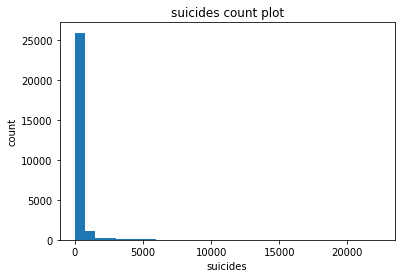

In [48]:
#Plotting suicides count
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(df.suicides_no, bins=30)
ax.set_ylabel('count')
ax.set_xlabel('suicides')
ax.set_title('suicides count plot')

Text(0.5, 1.0, 'suicides per 100k count plot')

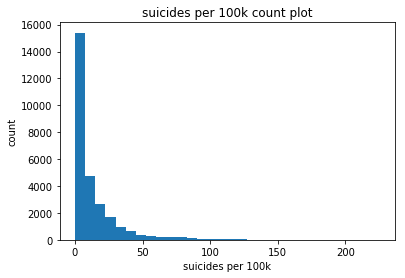

In [49]:
#Plotting suicides count per 100k
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(df.suicides_rates, bins=30)
ax.set_ylabel('count')
ax.set_xlabel('suicides per 100k')
ax.set_title('suicides per 100k count plot')

Text(0.5, 1.0, 'gdp for year count plot')

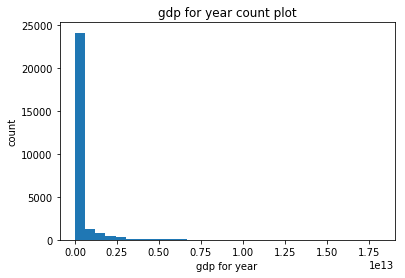

In [50]:
#Plotting suicides count per 100k
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(df.gdp_for_year, bins=30)
ax.set_ylabel('count')
ax.set_xlabel('gdp for year')
ax.set_title('gdp for year count plot')

Text(0.5, 1.0, 'unemployment index count plot')

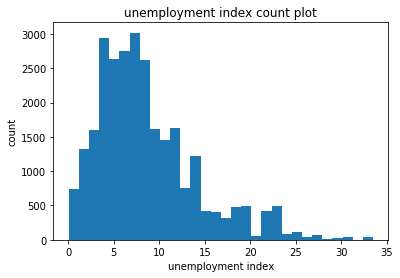

In [51]:
#Plotting suicides count per 100k
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(df['unemployment_index'], bins=30)
ax.set_ylabel('count')
ax.set_xlabel('unemployment index')
ax.set_title('unemployment index count plot')

# Now we are finding correlation

# Pearson Correlation

In [52]:
#correlation between all columns via pearson meathod
df.corr(method='pearson').style.background_gradient()

,year,suicides_no,population,suicides_rates,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop
year,1,-0.00454596,0.00885017,-0.0390368,0.0805717,0.0945286,0.339134,-0.015185,-0.00202236,-0.0260747,0.0247685,0.203817,0.13848,-0.0158461,-0.0390377
suicides_no,-0.00454596,1,0.616162,0.306604,-0.127573,0.430096,0.0613297,-0.0684484,0.486679,0.288144,0.358855,0.320114,0.158629,-0.0396151,0.306603
population,0.00885017,0.616162,1,0.00828497,-0.0433515,0.710697,0.0815099,-0.0936412,0.544806,0.0798899,0.6195,0.543428,0.10277,-0.0688492,0.00828348
suicides_rates,-0.0390368,0.306604,0.00828497,1,-0.0166306,0.0252396,0.00178513,-0.0419597,0.481148,0.799545,0.0492816,0.097263,0.117337,-0.00186795,1
HDI_for_year,0.0805717,-0.127573,-0.0433515,-0.0166306,1,0.140713,0.346445,-0.0851944,0.0381365,0.0525567,0.0648844,0.237033,0.997919,-0.0548862,-0.0166322
gdp_for_year,0.0945286,0.430096,0.710697,0.0252396,0.140713,1,0.303405,-0.09588,0.37638,0.079548,0.404394,0.507171,0.286911,-0.0627185,0.0252383
gdp_per_capita,0.339134,0.0613297,0.0815099,0.00178513,0.346445,0.303405,1,-0.259976,0.0804683,0.0674225,0.0605913,0.486275,0.706405,-0.249249,0.00178316
unemployment_index,-0.015185,-0.0684484,-0.0936412,-0.0419597,-0.0851944,-0.09588,-0.259976,1,-0.161967,-0.106668,-0.161516,-0.24519,-0.109796,0.925801,-0.0419589
log_suicides,-0.00202236,0.486679,0.544806,0.481148,0.0381365,0.37638,0.0804683,-0.161967,1,0.715412,0.777018,0.671883,0.207466,-0.103759,0.481147
the_suicides,-0.0260747,0.288144,0.0798899,0.799545,0.0525567,0.079548,0.0674225,-0.106668,0.715412,1,0.234939,0.244041,0.169238,-0.0438289,0.799545


# Kendall Correlation

In [53]:
#correlation between all columns via kendall meathod
df.corr(method='kendall').style.background_gradient()

,year,suicides_no,population,suicides_rates,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop
year,1,-0.00286642,0.00974849,-0.0197767,0.0900168,0.137381,0.240563,-0.0178912,-0.00286642,-0.0197767,0.00974849,0.137381,0.0928548,-0.0178913,-0.0197754
suicides_no,-0.00286642,1,0.59045,0.550809,0.120887,0.482512,0.0671338,-0.0795814,1,0.550809,0.59045,0.482512,0.145297,-0.0795815,0.550717
population,0.00974849,0.59045,1,0.141212,0.0856116,0.589661,0.0472603,-0.0903013,0.59045,0.141212,1,0.589661,0.100349,-0.0903013,0.141169
suicides_rates,-0.0197767,0.550809,0.141212,1,0.103466,0.164381,0.047641,-0.0344235,0.550809,1,0.141212,0.164381,0.120892,-0.0344235,0.999834
HDI_for_year,0.0900168,0.120887,0.0856116,0.103466,1,0.362852,0.606595,-0.0877994,0.120887,0.103466,0.0856116,0.362852,1,-0.0877995,0.103444
gdp_for_year,0.137381,0.482512,0.589661,0.164381,0.362852,1,0.40796,-0.133698,0.482512,0.164381,0.589661,1,0.415582,-0.133698,0.164352
gdp_per_capita,0.240563,0.0671338,0.0472603,0.047641,0.606595,0.40796,1,-0.137913,0.0671338,0.047641,0.0472603,0.40796,0.678667,-0.137913,0.0476295
unemployment_index,-0.0178912,-0.0795814,-0.0903013,-0.0344235,-0.0877994,-0.133698,-0.137913,1,-0.0795814,-0.0344235,-0.0903013,-0.133698,-0.0891727,1,-0.0344154
log_suicides,-0.00286642,1,0.59045,0.550809,0.120887,0.482512,0.0671338,-0.0795814,1,0.550809,0.59045,0.482512,0.145297,-0.0795815,0.550717
the_suicides,-0.0197767,0.550809,0.141212,1,0.103466,0.164381,0.047641,-0.0344235,0.550809,1,0.141212,0.164381,0.120892,-0.0344235,0.999834


# Spearman Correlation

In [54]:
#correlation between all columns via spearman meathod
df.corr(method='spearman').style.background_gradient()

,year,suicides_no,population,suicides_rates,HDI_for_year,gdp_for_year,gdp_per_capita,unemployment_index,log_suicides,the_suicides,log_population,log_gdp_for_year,log_HDI_for_year,log_unemployment_index,suicide_x_pop
year,1,-0.0041464,0.0142148,-0.0291783,0.131543,0.19954,0.349895,-0.0265315,-0.0041464,-0.0291783,0.0142148,0.19954,0.135844,-0.0265315,-0.0291805
suicides_no,-0.0041464,1,0.77558,0.724183,0.178844,0.65858,0.100735,-0.115577,1,0.724183,0.77558,0.65858,0.218669,-0.115577,0.724183
population,0.0142148,0.77558,1,0.215128,0.122581,0.783096,0.0707446,-0.131465,0.77558,0.215128,1,0.783096,0.146403,-0.131465,0.215126
suicides_rates,-0.0291783,0.724183,0.215128,1,0.157185,0.244122,0.0730633,-0.0530261,0.724183,1,0.215128,0.244122,0.185793,-0.0530261,1
HDI_for_year,0.131543,0.178844,0.122581,0.157185,1,0.510152,0.785544,-0.12316,0.178844,0.157185,0.122581,0.510152,1,-0.12316,0.157178
gdp_for_year,0.19954,0.65858,0.783096,0.244122,0.510152,1,0.584626,-0.198102,0.65858,0.244122,0.783096,1,0.591725,-0.198102,0.244119
gdp_per_capita,0.349895,0.100735,0.0707446,0.0730633,0.785544,0.584626,1,-0.19881,0.100735,0.0730633,0.0707446,0.584626,0.873223,-0.19881,0.0730586
unemployment_index,-0.0265315,-0.115577,-0.131465,-0.0530261,-0.12316,-0.198102,-0.19881,1,-0.115577,-0.0530261,-0.131465,-0.198102,-0.125176,1,-0.0530222
log_suicides,-0.0041464,1,0.77558,0.724183,0.178844,0.65858,0.100735,-0.115577,1,0.724183,0.77558,0.65858,0.218669,-0.115577,0.724183
the_suicides,-0.0291783,0.724183,0.215128,1,0.157185,0.244122,0.0730633,-0.0530261,0.724183,1,0.215128,0.244122,0.185793,-0.0530261,1


# As data is skewed and not equally distributed we will consider Spearman and Kendall

In [55]:
#grouping by country and summing all sucides_no
country=df.groupby('country')['suicides_rates'].sum()

In [56]:
#considering only top 10 countries where suicide rate higher
keys=country.nlargest(10).keys()

In [57]:
keys

Index(['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan',
       'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland',
       'Belgium'],
      dtype='object', name='country')

C:\Users\abrar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0

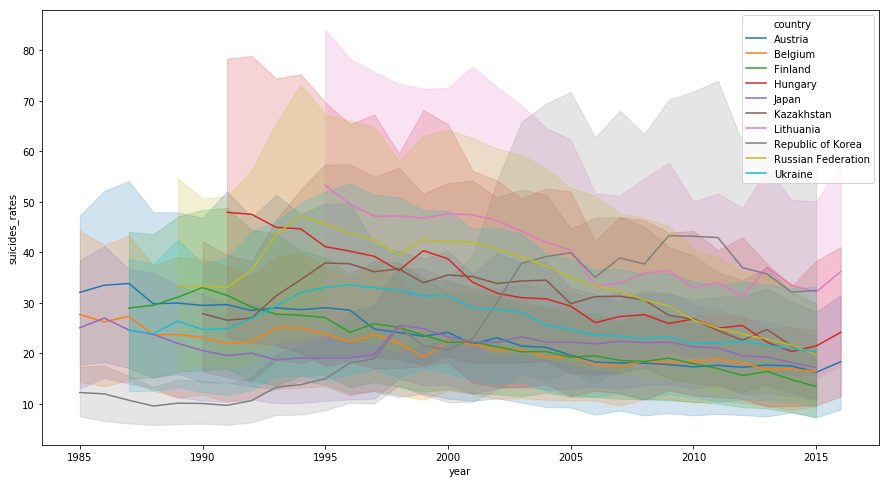

In [58]:
#plotting and comparing for top 10 suicidal countries
def dl(df):
    df = df
    df = df[df['country'].isin(['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan',
       'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland','Belgium'])]
    plt.figure(figsize=(15,8))
    sns.lineplot(data=df,x='year',y='suicides_rates',hue="country")
    return 0
dl(df)

0

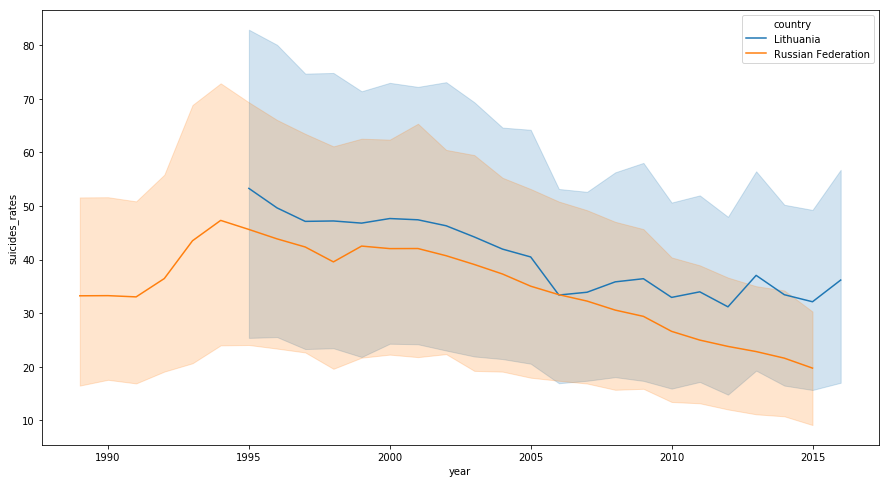

In [60]:
# Comparing the two countries Russian Federation and France
def dl(df):
    df = df
    df = df[df['country'].isin(['Russian Federation','Lithuania'])]
    plt.figure(figsize=(15,8))
    sns.lineplot(data=df,x='year',y='suicides_rates',hue="country")
    return 0
dl(df)

In [59]:
#creating a temporary data frame for only those 10 country and excluding rest
temp= df[df['country'].isin(['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan',
       'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland','Belgium'])]

In [60]:
#now we sum the tottal suicides according to country
temp=temp.groupby('country')['suicides_no'].sum()

In [61]:
#creating a data frame for plotting convinience
df2=pd.DataFrame({'country':temp.keys(),'suicides_no':temp.values})

In [62]:
#checking data frame
df2

,country,suicides_no
0,Austria,50073
1,Belgium,62761
2,Finland,33677
3,Hungary,73891
4,Japan,806902
5,Kazakhstan,101546
6,Lithuania,28039
7,Republic of Korea,261730
8,Russian Federation,1209742
9,Ukraine,319950


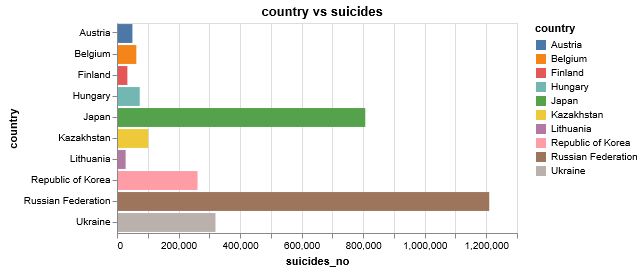

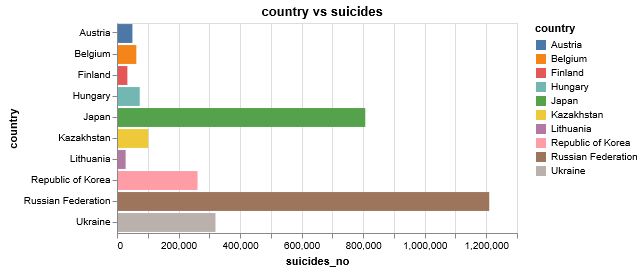

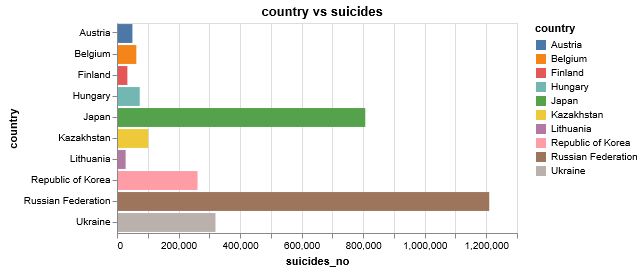

In [63]:
#plotting using altair 
alt.Chart(df2).mark_bar().encode(
    x='suicides_no',
    y='country',
    color='country'
    
).properties(
    title='country vs suicides'
)

In [64]:
#creating a temporary data frame for only those 10 country and excluding rest
temp1= df[df['country'].isin(['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan',
       'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland','Belgium'])]

In [65]:
#now we sum the tottal suicides according to country
temp1=temp1.groupby('country')['suicides_rates'].sum()

In [69]:
#creating a data frame for plotting convinience
df2=pd.DataFrame({'country':temp1.keys(),'suicides_rates':temp1.values})

In [70]:
df2

,country,suicides_rates
0,Austria,9076.23
1,Belgium,7900.50
2,Finland,7924.11
3,Hungary,10156.07
4,Japan,8025.23
5,Kazakhstan,9519.52
6,Lithuania,10588.88
7,Republic of Korea,9350.45
8,Russian Federation,11305.13
9,Ukraine,8931.66


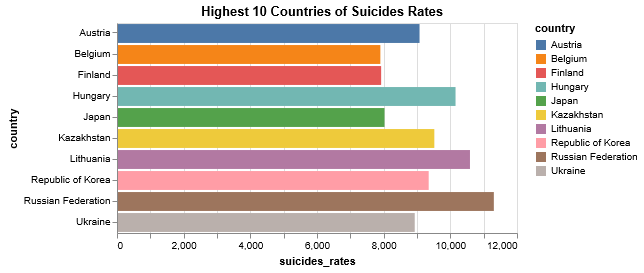

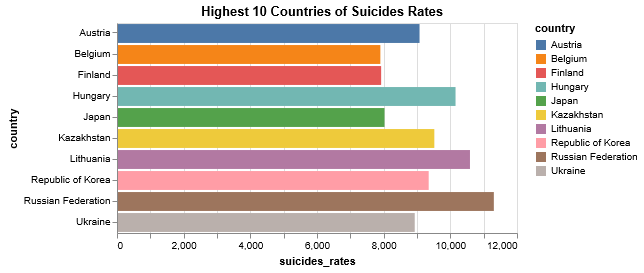

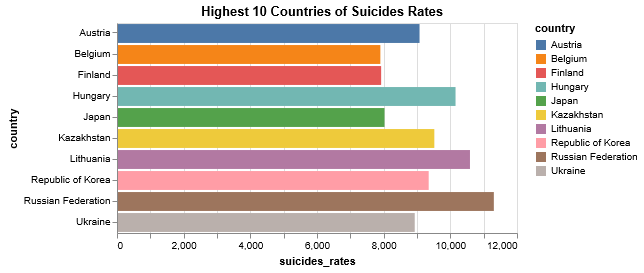

In [93]:
#plotting using altair 
alt.Chart(df2).mark_bar().encode(
    x='suicides_rates',
    y='country',
    color='country'
    
).properties(
    title='Highest 10 Countries of Suicides Rates'
)

# France has the highest number of suicides

In [72]:
#now we sum the tottal suicides according to year
yearly=df.groupby('year')['suicides_no'].sum()

In [73]:
#creating a data frame for plotting convinience
df3=pd.DataFrame({'year':yearly.keys(),'suicides_no':yearly.values})

In [74]:
df3.head()

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


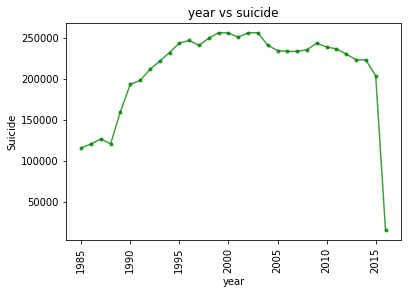

In [75]:
#year vs suicide
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_title('year vs suicide')
ax.set_xlabel('year')
ax.set_ylabel('Suicide')
plt.xticks(rotation=90)
ax.plot(df3['year'], df3.suicides_no , c='green', marker='.', alpha=0.75)

In [73]:
print(max(df3.suicides_no))
df3.iloc[[df3[df3['suicides_no'] == 256119].index[0]]]

256119


,year,suicides_no
14,1999,256119


# Year 1999 has maximum suicides of 124526. After year 2003 there is decrease in suicide rate.

In [76]:
#so that plotting be in sequence
df=df.replace('5-14 years', '05-14 years')

In [77]:
#now we sum the tottal suicides according to age
age=df.groupby('age')['suicides_no'].sum()

In [78]:
#creating a data frame for plotting convinience
df4=pd.DataFrame({'age':age.keys(),'suicides_no':age.values})

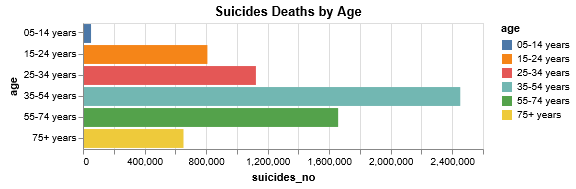

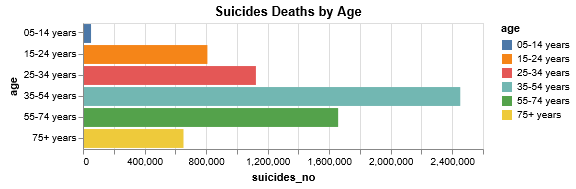

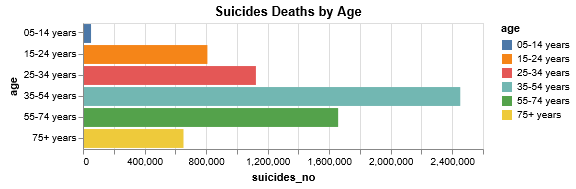

In [87]:
alt.Chart(df4).mark_bar().encode(
    x='suicides_no',
    y='age',
    color='age'
).properties(
    title='Suicides Deaths by Age'
)

# Age 35-54 has Maximum number of suicides

In [80]:
#now we sum the tottal suicides according to gender
sex=df.groupby('sex')['suicides_no'].sum()

In [81]:
#creating a data frame for plotting convinience
df5=pd.DataFrame({'sex':sex.keys(),'suicides_no':sex.values})

In [82]:
df5

,sex,suicides_no
0,female,1559510
1,male,5188910


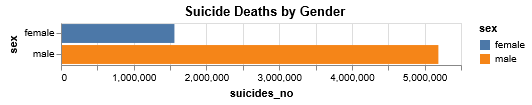

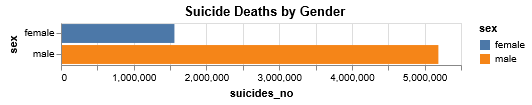

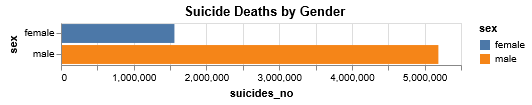

In [89]:
alt.Chart(df5).mark_bar().encode(
    x='suicides_no',
    y='sex',
    color='sex'
).properties(
    title='Suicide Deaths by Gender '
)

# Maximum suicides are conducted by Males

In [90]:
#now we sum the tottal suicides according to generation
generation=df.groupby('generation')['suicides_no'].sum()

In [91]:
#creating a data frame for plotting convinience
df6=pd.DataFrame({'generation':generation.keys(),'suicides_no':generation.values})

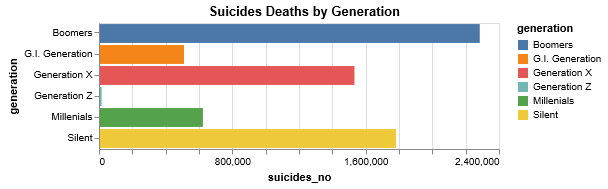

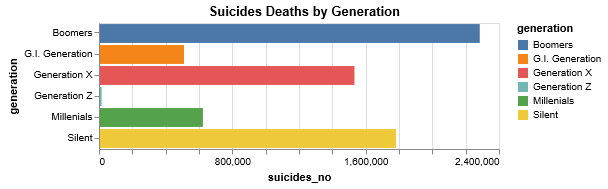

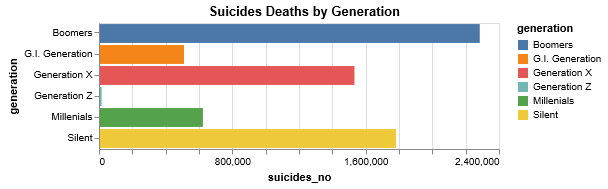

In [92]:
alt.Chart(df6).mark_bar().encode(
    x='suicides_no',
    y='generation',
    color='generation',
).properties(
    title='Suicides Deaths by Generation'
)

# Generation Boomers performed maximum suicides and Generation Z has minimum suicides

In [85]:
from scipy.stats import linregress


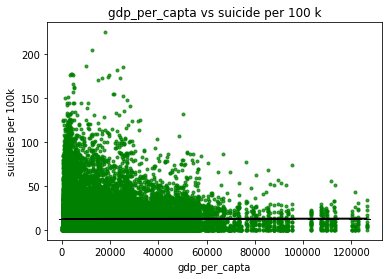

In [86]:
#gdp_per_capita vs suicide per 100k
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_title('gdp_per_capta vs suicide per 100 k')
ax.set_xlabel('gdp_per_capta')
ax.set_ylabel('suicides per 100k')

ax.scatter(df['gdp_per_capita'], df.suicides_rates , c='green', marker='.', alpha=0.75)
slope, intercept, _,_,_ = linregress(df['gdp_per_capita'], df.suicides_rates)
ax.plot(df.gdp_per_capita, slope*df.gdp_per_capita + intercept, c='black', marker='_')

# From Above Graphs it can be concluded that there is slight positive correlation in suicide no with GDP per capta

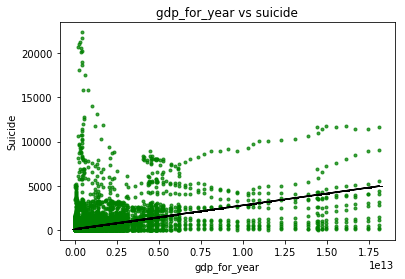

In [87]:
#gdp_for_year vs suicide
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_title('gdp_for_year vs suicide')
ax.set_xlabel('gdp_for_year')
ax.set_ylabel('Suicide')
ax.scatter(df['gdp_for_year'], df.suicides_no , c='green', marker='.', alpha=0.75)
slope, intercept, _,_,_ = linregress(df['gdp_for_year'], df.suicides_no )
ax.plot(df['gdp_for_year'], slope*df['gdp_for_year'] + intercept, c='black', marker='_')

# From Above Graphs it can be concluded that there is positive correlation in suicide no with GDP for Year

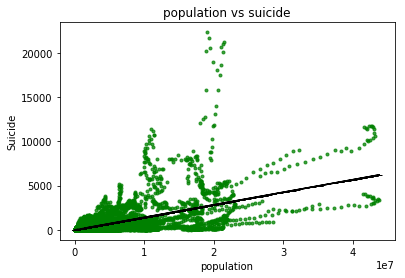

In [88]:
#population vs suicide
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_title('population vs suicide')
ax.set_xlabel('population')
ax.set_ylabel('Suicide')
ax.scatter(df['population'], df.suicides_no , c='green', marker='.', alpha=0.75)
slope, intercept, _,_,_ = linregress(df['population'], df.suicides_no)
ax.plot(df['population'], slope*df['population'] + intercept, c='black', marker='_')

# From Above Graphs it can be concluded that there is positive correlation in suicide no with Population

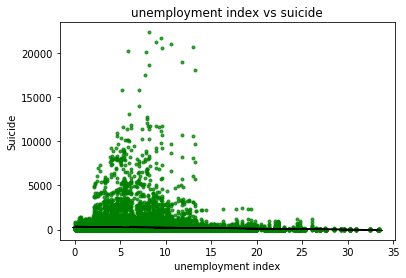

In [89]:
#unemployment index vs suicide
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_title('unemployment index vs suicide')
ax.set_xlabel('unemployment index')
ax.set_ylabel('Suicide')
ax.scatter(df['unemployment_index'], df.suicides_no , c='green', marker='.', alpha=0.75)
slope, intercept, _,_,_ = linregress(df['unemployment_index'], df.suicides_no)
ax.plot(df['unemployment_index'], slope*df['unemployment_index'] + intercept, c='black', marker='_')

# From Above Graphs it can be concluded that there is slight negative correlation in suicide no with Unemployment Index